# Random Walker

Here we setup, run and plot a two-dimensional random walker path.

In [1]:
using ClimateModels, Pkg, Plots, CSV, DataFrames

## Formulate Model

This simple model steps randomly, `N` times, on a `x,y` plane starting from `0,0`.

In [2]:
function RandomWalker(x)
    #model run
    nSteps=x.inputs["nSteps"]
    m=zeros(nSteps,2)
    [m[i,j]=m[i-1,j]+rand((-1,1)) for j in 1:2, i in 2:nSteps]

    #output to file
    df = DataFrame(x = m[:,1], y = m[:,2])
    fil=joinpath(x.folder,string(x.ID),"RandomWalker.csv")
    CSV.write(fil, df)

    return m
end

RandomWalker (generic function with 1 method)

## Setup And Run Model

- `ModelConfig` defines the model into data structure `m`
- `setup` prepares the model to run in a temporary folder
- `launch` runs the `RandomWalker` model which writes results to file

_Note: `RandomWalker` returns results also directly as an Array, but this is generally not an option for most, larger, models_

In [3]:
m=ModelConfig(model=RandomWalker,inputs=Dict("nSteps" => 1000))
setup(m)
launch(m)
m

  ID            = f5372c1a-f633-4771-bba5-7d06bcdc8d6c
  model         = RandomWalker
  configuration = anonymous
  folder        = /tmp
  log subfolder = f5372c1a-f633-4771-bba5-7d06bcdc8d6c/log


## Exercise

Change the duration parameter (nSteps) and update the following cells?

In [4]:
m.inputs["nSteps"]=10000
setup(m)
launch(m)

## Plot Results

Afterwards, one often uses model output for further analysis. Here we plot the random walker path from the `csv` output file.

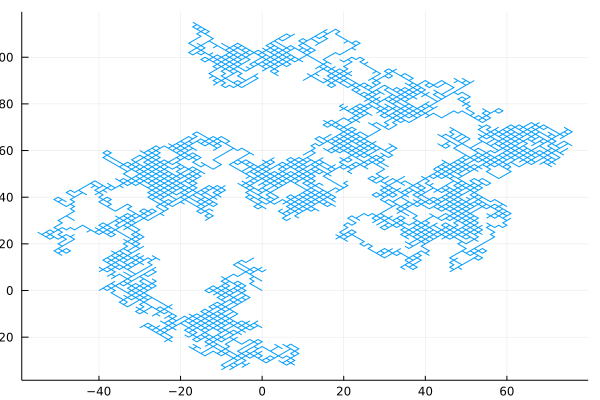

In [5]:
fil=joinpath(m.folder,string(m.ID),"RandomWalker.csv")
output = CSV.File(fil) |> DataFrame
img=plot(output.x,output.y,frmt=:png,leg=:none)

## Workflow Outline

Workflow steps are documented using `git`.
Here we show the git record for this workflow (in timeline order).

In [6]:
git_log_show(m)

7-element Vector{String}:
 "2cfb654 initial setup"
 "c6767ad initial tracked_parameters.toml"
 "82f874d task started [6e31cd80-c662-407c-95f1-b140050c3a9a]"
 "02cb865 task ended   [6e31cd80-c662-407c-95f1-b140050c3a9a]"
 "3b34463 modify tracked_parameters.toml"
 "9dd81df task started [fc3dfe62-1f1a-4e90-b591-0b1d28c782b7]"
 "649bfc7 (HEAD -> main) task ended   [fc3dfe62-1f1a-4e90-b591-0b1d28c782b7]"

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*